# Setup 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Divide and conquer

*Divide and conquer* is a well-known recursive technique for solving problems. More than that, it represents a particular way to think about solving problems, which can come in handy when no known algorithms are applicable.

## Problem 1: Divide the land

To illustrate this technique, let us consider the following problem: given a plot of land which is 1980 meters wide and 640 meters long, what is the **biggest square plot that can divide the farm evenly?** In other words, we want to find the size of a square that:
* divides the farm evenly in square plots
* there is no bigger square that can divide the farm

In order to solve a problem with divide and conquer (D&C) recursive algorithms, we have to think of two steps.
1) Figure out the base case. This should be the simplest possible case
2) Divide or decrease the problem until it becomes the base case

First, let us figure out the base case. The easiest possible case would be if one side of the land was a multiple of the other side! If the whole plot was $25$ m $\times$ $50$ m, the largest box we could use would be $25$ m $\times$ $25$ m.

Second, we have to figure out the recursive case. According to D&C, with every recursive call, we have to reduce the problem. How could we achieve that? Coming back to our original problem, let us start by marking out the biggest boxes we can use.

We could fit two $640$ m $\times$ $640$ m boxes in there, and there would be *some land* still left to be divided. The **tricky** part is to realise that if we were to solve the problem for this part of the land, that will be the biggest box that will work for the entire farm! We have effectively reduced the problem from a $1680$ m $\times$ $640$ m farm to a $640$ m $\times$ $400$ m farm. 

![text](diagram.png)

***
**Euclid's algorithm**

The reason why, if we solve the problem for the left-over piece of land, we have actually solved it for the entire plot of land, is not evident at first glance. Although the formal proof lays in the [Euclidean algorithm](https://en.wikipedia.org/wiki/Euclidean_algorithm) (an efficient method for computing the greatest common divisor of two integers), this particular problem offers us a visual representation of the proof.

It goes something like this.
* When we remove the largest square or squares from the initial plot of land, the remaining plot shares one side with the squares.
* Thus, if we find the largest square that can cover this subplot, surely it must be able to also cover the additional squares that we set aside (owing to the side that they have in common).
* If we remove square plots from that subplot, they will also share an edge with the remaining sub-subplot.
* Logically, if we were to find a solution for this sub-sub-plot, it would also be applicable to the larger subplot, and by extension, to the even larger total plot that we start with.
* We can iterate until we find a plot that can be trivially divided into squares (one of its sides is a multiple of the other).
* The solution to that problem will be applicable to the entire piece of land, and constitutes the solution to our problem.
***

An example of this idea in code is shown below

In [2]:
def find_largest_square(X, Y):
    # Initialization
    large_side = max(X, Y)
    small_side = min(X, Y)

    # base case
    if large_side % small_side == 0:
        return small_side
        
    # recursion
    else:
        # we remove the largest possible square from the plot of land
        new_large_side = large_side - small_side
        return find_largest_square(new_large_side, small_side)

In [3]:
find_largest_square(1680, 640)

80

In [4]:
1680/80

21.0

In [5]:
640/80

8.0

**Solution**: Our land can be evenly divided into $80$ $m$ square plots, into $21$ $\times$ $8$ such plots!

## Problem 2: Add numbers in an array

Let us do another problem. You are given an array of numbers. You have to add up all the numbers and return the total. This is trivial to do with a loop

```python
def sum(arr):
    total = 0
    for x in arr:
        total += x
    return total
```


But how could we do this with a recursive function?

**Step 1:** Figure out the base case. What is the simplest array? One with 0 or 1 elements, for which the sum is trivial (either 0 or the only element).

**Step 2:** Need closer to the base case with every recursive call. How to reduce the problem size?

If we are given the array `[2, 3, 4]`, we note that
* `sum([2, 3, 4])` is the same as
* 2 + `sum([3, 4]`, which  is the same as
* 3 + `sum([4])`, which is our base case!

> When writing a recursive function that involves an array, the base case is often an empty array or an array with one element! Remember to try this first.

This idea is implemented in the code below

In [6]:
def sum(arr):
    if len(arr) == 0:
        return 0
    else:
        return arr[0] + sum(arr[1:])

In [7]:
arr = [2,3,4]
sum(arr)

9

***
**Functional programming**

Functional programming languages like Haskell do not have loops. Instead, they must implement these kinds of functions in the form of recursion. For example, here is how to write a `sum` function in Haskell.

```haskell
sum [] = 0 --base case
sum (x:xs) = x + sum xs) -- recursive case
```
or, equivalently, using an `if` statement,
```haskell
sum arr = if arr == []
    then 0
    else (head arr) + (sum (tail arr))
```
Because Haskell makes heavy use of recursion, it includes all kinds of niceties like this to make recursion easy.
***

# Quicksort

`Quicksort` is a sorting algorithm, which is much faster than `selection sort`. Quicksort also uses D&C. With this in mind, let us work out an implementation based on the ideas presented in this chapter.

The base case, not surprisingly, will be empty arrays and arrays with only one element. This arrays can be returned as they are -- there is nothing to sort:

```python
def base_quicksort(array):
    if len(array) < 2:
        return array
```

Sorting arrays of two elements are pretty easy to sort, too, as we only need to compare their values, and if the first is larger than the second, swap them.

What about arrays of three elements? The goal here is to reduce the problem to arrays of 2 elements or less. One strategy to achieve this is called *partitioning*, and it consists of selecting an element to *pivot* on, and dividing the array into elements smaller than the pivot, and elements larger than the pivot.


* this is the initial array `[33, 15, 10]`
* we select `33` as a pivot (it can be any number)
* we partition the array `[15, 10]` - `33` - `[]`


Since our base case includes how to sort 1- or 2- element arrays, we can apply the partitioning procedure recursively until we get a fully-sorted array! We can choose any number of pivot on, as it will always reduce the number of elements to consider by 1 when it divides the array into two sub-arrays.

here are all the different ways of partitioning
`[1,3,5,2,4]`

`       [] 1 [3,5,2,4]`

`      [1] 3 [5,2,4]`

`    [1,3] 5 [2,4]`

`  [1,3,5] 2 [4]`

`[1,3,5,2] 4 []`

Below is the code for quicksort

In [8]:
def quicksort(arr):
    # base case: arrays with 0 or 1 elements are already sorted
    if len(arr) < 2:
        return arr
        
    # recursive case
    else:
        # we choose the first element as a pivot
        pivot = arr[0]
        # we partition the array into two sub-arrays:
        # elements less than the pivot
        left_array = [i for i in arr[1:] if i <= pivot]
        # elements great than the pivot
        right_array = [i for i in arr[1:] if i > pivot]

        return quicksort(left_array) + [pivot] + quicksort(right_array)

In [9]:
arr = [100,0,1,201,3,5,107,7,9,12,15,64,101,105,109,401]
quicksort(arr)

[0, 1, 3, 5, 7, 9, 12, 15, 64, 100, 101, 105, 107, 109, 201, 401]

***
**Inductive proofs**

Our reasoning/explanation for the quicksort algorithm is an example of an *inductive proofs*. Inductive proofs are one way to prove that our algorithm works. Each inductive proof has two steps: the base case and the inductive case. Sounds familiar?

For example, suppose we want to prove that I can climb to the top of a ladder. In the inductive case, if my legs are on a rung, I can put my legs on the next rung. If I am in rung 2, I can climb to rung 3, and so on. That's the inductive case. For the base case, we can say that my legs are on rung 1. Therefore, we conclude that I can climb the entire ladder, going up one rung at a time.

Inductive proofs are fun and go hand in hand with divide and conquer algorithms!
***

# Big O notation revisited

**The worst case**

What is the running time of *quicksort*? Let us think of the worst case, where we have an already sorted array, and we always pick the first element as a pivot. In this case, there will always be an empty array as `left_array`. We will have to check $O(n)$ elements on every level of the *call stack*.

$O(n)$ elements
`     [1,2,3,4,5,6,7,8]`

$O(n)$ elements
`[] 1 [2,3,4,5,6,7,8]`

$O(n)$ elements
`[] 2 [3,4,5,6,7,8]`

$O(n)$ elements
`[] 3 [4,5,6,7,8]`

$O(n)$ elements
`[] 4 [5,6,7,8]`

... up to $O(n)$ times


In this worst case, quicksort will run in $O(n) \times O(n) = O(n^2)$.

**The best case**

In the best case, quicksort will use the *middle element* as the pivot. Because of this, the array will be divided in half every time, and consequently we will hit the base case sooner, and the call stack will be shorter as well.


$O(n)$ elements
`      [1,2,3,4,5,6,7,8]`

$O(n)$ elements
` [1,2,3]     4   [,5,6,7,8]`

$O(n)$ elements
`[1] 2 [3]   --   [5] 6 [7,8]`

`                                    7 [8]`

In this example, there are $O(\log n)$ levels (this is, the height of the call stack).

Thus, since each level takes $O(n)$, in this best case, quicksort will run in $O(\log n) \times O(n) = O(n \times \log n)$.

**The average case**

What is the running time of quickshort on average? Well, the best case is also the average case! If you always choose a random element in the array as the pivot, quicksort will complete in $O(n \times \log n)$ on average. There is one exception though: if all the elements in the array are the same, we will always hit worst-case run time without some additional logic).

Quicksort is one of the fastest sorting algorithm that we know of, and it is a very good example of D&C.

# Running times visualized

In [10]:
import sys
sys.setrecursionlimit(50000)

In [11]:
import time

# this function will measure how long a given function takes to process an array
def measure_running_time(func, arr):
    start_time = time.perf_counter()
    func(arr)
    end_time = time.perf_counter()
    return end_time - start_time

In [12]:
N_repeats = 25
list_Nsizes = np.arange(1, 100000, 10000)

## Worst case quicksort

In [13]:
def quicksort_worst(arr):
    """
    We use the first element as a pivot
    """
    # base case: arrays with 0 or 1 elements are already sorted
    if len(arr) < 2:
        return arr
        
    # recursive case
    else:
        # we choose the first element as a pivot
        pivot = arr[0]
        
        # we partition the array into two sub-arrays:
        left_array = []
        right_array = []

        for x in arr[1:]:
            # elements less than the pivot
            if x <= pivot:
                left_array.append(x)
            # elements great than the pivot
            else:
                right_array.append(x)

        return quicksort_worst(left_array) + [pivot] + quicksort_worst(right_array)

In [14]:
# test run
array = np.random.randint(low=0, high=10000, size=10000).tolist()
print(quicksort_worst(array)[:100])

[0, 1, 2, 4, 4, 5, 6, 6, 9, 9, 10, 13, 15, 17, 20, 23, 25, 28, 28, 29, 30, 30, 31, 31, 31, 31, 33, 37, 38, 40, 41, 42, 43, 46, 47, 48, 49, 49, 50, 50, 50, 51, 53, 55, 56, 56, 56, 57, 61, 62, 62, 65, 66, 67, 67, 68, 70, 70, 70, 72, 74, 76, 77, 78, 78, 81, 82, 83, 84, 86, 87, 88, 88, 92, 94, 96, 96, 97, 97, 100, 100, 105, 105, 108, 109, 110, 112, 113, 113, 115, 116, 116, 117, 117, 117, 118, 118, 120, 122, 125]


In [15]:
measure_running_time(quicksort_worst, array)

0.009395914996275678

In [16]:
# gather data of running time
list_runtimes_worst = []

for N in list_Nsizes:
    local_list = []
    for i_rep in range(N_repeats):
        array = np.random.randint(low=0, high=10000, size=N).tolist()
        run_time = measure_running_time(quicksort_worst, array)
        local_list.append(run_time)
    avg_runtime = sum(local_list) / len(local_list)
    list_runtimes_worst.append(avg_runtime)

## Best case quicksort

In [17]:
def quicksort_best(arr):
    # base case: arrays with 0 or 1 elements are already sorted
    if len(arr) < 2:
        return arr
        
    # recursive case
    else:
        # we choose the middle element as a pivot
        idx_pivot = len(arr) // 2
        pivot = arr[idx_pivot]
        
        # we partition the array into two sub-arrays:
        array_considered = arr[:idx_pivot] + arr[idx_pivot+1:]

        left_array = []
        right_array = []

        for x in array_considered:
            # elements less than the pivot
            if x <= pivot:
                left_array.append(x)
            # elements great than the pivot
            else:
                right_array.append(x)
                
        return quicksort_best(left_array) + [pivot] + quicksort_best(right_array)

In [18]:
# test run
array = np.random.randint(low=0, high=10000, size=10000).tolist()
print(quicksort_best(array)[:100])

[0, 1, 3, 5, 6, 6, 8, 8, 9, 11, 13, 15, 16, 16, 16, 17, 18, 18, 18, 21, 21, 22, 23, 24, 26, 27, 28, 28, 28, 28, 29, 30, 31, 31, 33, 33, 34, 35, 36, 38, 42, 42, 42, 43, 43, 45, 46, 46, 48, 51, 53, 53, 53, 55, 56, 56, 57, 58, 60, 61, 62, 64, 64, 65, 66, 66, 66, 67, 69, 71, 71, 72, 74, 74, 76, 76, 76, 77, 78, 81, 81, 81, 82, 84, 85, 86, 86, 88, 88, 91, 92, 94, 95, 99, 100, 101, 103, 104, 104, 106]


In [19]:
measure_running_time(quicksort_best, array)

0.010925412003416568

In [20]:
# gather data of running time
list_runtimes_best = []

for N in list_Nsizes:
    local_list = []
    for i_rep in range(N_repeats):
        array = np.random.randint(low=0, high=10000, size=N).tolist()
        run_time = measure_running_time(quicksort_best, array)
        local_list.append(run_time)
    avg_runtime = sum(local_list) / len(local_list)
    list_runtimes_best.append(avg_runtime)

data_fullyrandom = (list_runtimes_worst, list_runtimes_best)

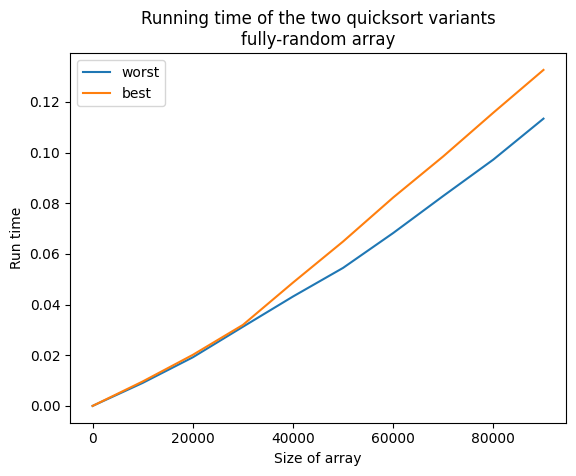

In [21]:
plt.plot(list_Nsizes, list_runtimes_worst, label='worst')
plt.plot(list_Nsizes, list_runtimes_best, label='best')

plt.legend()
plt.xlabel('Size of array')
plt.ylabel('Run time')
plt.title('Running time of the two quicksort variants\nfully-random array')
plt.show()

Wait a minute, the book promised that the 'best case' quicksort would be faster, but it performs worse! What gives? After some investigation (and more careful reading of the book chapter), it seems to me that the *worst case* consists of using one of the edges as pivot **and** sorting an already ordered array.

If we try to use a *worst case* quicksort variant with a completely random array, it tends to perform better than the *best case* version, perhaps due to the extra list creation step. To investigate it, I will also try to run these tests with a *somewhat disordered* array.

## Situational optimality

In [22]:
import random

def generate_slightly_shuffled_array(N, d=50):
    if N == 1:
        return [0]
    arr = list(range(0, N))
    for _ in range(d):  # Adjust the range to control the degree of disorder
        idx1, idx2 = random.sample(range(len(arr)), 2)
        arr[idx1], arr[idx2] = arr[idx2], arr[idx1]
    return arr

def generate_ordered_array(N):
    if N == 1:
        return [0]
    arr = list(range(0, N))
    return arr

In [23]:
# gather data of running time
list_runtimes_worst = []

for N in list_Nsizes:
    local_list = []
    for i_rep in range(N_repeats):
        array = generate_slightly_shuffled_array(N)
        random.shuffle(array)
        run_time = measure_running_time(quicksort_worst, array)
        local_list.append(run_time)
    avg_runtime = sum(local_list) / len(local_list)
    list_runtimes_worst.append(avg_runtime)

In [24]:
# gather data of running time
list_runtimes_best = []

for N in list_Nsizes:
    local_list = []
    for i_rep in range(N_repeats):
        array = generate_slightly_shuffled_array(N)
        run_time = measure_running_time(quicksort_best, array)
        local_list.append(run_time)
    avg_runtime = sum(local_list) / len(local_list)
    list_runtimes_best.append(avg_runtime)

data_semiordered = (list_runtimes_worst, list_runtimes_best)

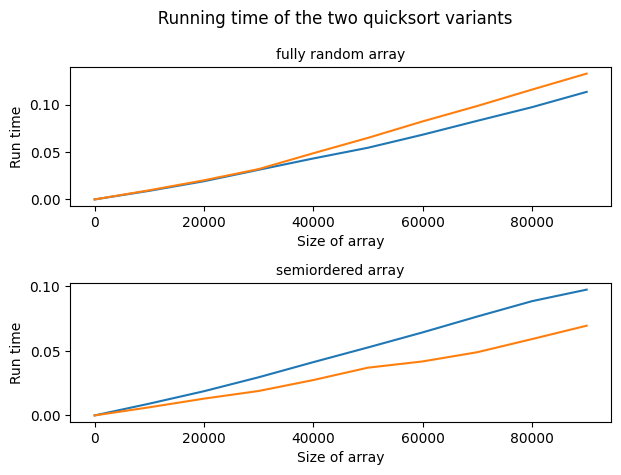

In [25]:
fig, axarr = plt.subplots(nrows=2, ncols=1)

# fully random
list_runtimes_worst, list_runtimes_best = data_fullyrandom
ax = axarr[0]
ax.plot(list_Nsizes, list_runtimes_worst, label='worst')
ax.plot(list_Nsizes, list_runtimes_best, label='best')
ax.set_title('fully random array', fontsize=10)

list_runtimes_worst, list_runtimes_best = data_semiordered
ax = axarr[1]
ax.plot(list_Nsizes, list_runtimes_worst, label='worst')
ax.plot(list_Nsizes, list_runtimes_best, label='best')
ax.set_title('semiordered array', fontsize=10)

for ax in axarr:
    ax.set_xlabel('Size of array')
    ax.set_ylabel('Run time')

plt.suptitle('           Running time of the two quicksort variants')
plt.tight_layout()
plt.show()

Aha! It would seem that indeed, the optimality of each form of the quicksort algorithm depends on the nature of the array to be sorted. For fully-random arrays, it does not really matter, but if the lists may have some order, the *best case* version perform better.

# Exercises

**4.1** Write out code for the earlier `sum` function.

**Answer**:

In [26]:
def sum(arr):
    if len(arr) == 0:
        return 0
    else:
        return arr[0] + sum(arr[1:])

arr = [2,3,4]
sum(arr)

9

**4.2** Write a recursive function to count the number of items in a list

**Answer**:

In [27]:
def count(arr):
    if len(arr) == 0:
        return 0
    else:
        return 1 + count(arr[1:])

In [28]:
arr = [2,5,7,9,10,14,15]
count(arr)

7

**4.3** Write a recursive function to find the maximum number in a list.

**Answer**:

In [29]:
# this is my own code (sorry for this, the book answer, which is better is below)
def maxi(arr):
    # base case
    if len(arr) == 1:
        return arr[0]
    
    else:
        left = arr[0]
        right = maxi(arr[1:])

        if left > right:
            return left
        else:
            return right

In [30]:
maxi([500, 10, 60, 501])

501

In [31]:
# an alternative solution (from the book)
def maxi(arr):
    if len(arr) == 2:
        return arr[0] if arr[0] > arr[1] else arr[1]
    sub_max = maxi(arr[1:])
    return arr[0] if arr[0] > sub_max else sub_max

In [32]:
maxi([500, 10, 60, 501])

501

**4.4** Remember binary search from chapter1? It is a D&C algorithm too. Can you come up with the base case and recursive case for binary search?

**Answer**:
* Base case: slice of an arry being considered has a length of 1 (it is trivial to check whether that one element is the one we were looking for or not)
* Recursive case: reduce the length of the considered slice by half by bifurcating our maximum- and minimum- guesses 

**How long would each of these operations take in big O notation?**

**4.5** Printing the value of each element in an array.

**Answer**: $O(n)$

**4.6** Doubling the value of each element in an array.

**Answer**: $O(n)$

**4.7** Doubling the value of just the first element in an array.

**Answer**: $O(1)$

**4.8** Creating a multiplication table with all the elements in the array. So
if your array is [2, 3, 7, 8, 10], you first multiply every element by 2,
then multiply every element by 3, then by 7, and so on.

**Answer**: $O(n^2)$